In [ ]:
#import required packages and libraries
!pip install haversine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from haversine import haversine
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#set style for graph
sns.set_style(style='darkgrid')

# Setting fontsizes,fontweight,label weight for labels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link='https://drive.google.com/file/d/1ndBO1KKbCgiW4XkBdlX5V1dTqswUQtcj/view?usp=sharing'

 
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('NYC Taxi Data.csv') 
 
df = pd.read_csv('NYC Taxi Data.csv')

In [ ]:
#first look checking top 5 rows
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [ ]:
#check information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,1458644,1458644,id2875421,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vendor_id,1458644.0,NaN,NaN,NaN,1.53495,0.498777,1.0,1.0,2.0,2.0,2.0
pickup_datetime,1458644,1380222,2016-03-04 08:07:34,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dropoff_datetime,1458644,1380377,2016-02-19 19:25:04,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
passenger_count,1458644.0,NaN,NaN,NaN,1.66453,1.314242,0.0,1.0,1.0,2.0,9.0
pickup_longitude,1458644.0,NaN,NaN,NaN,-73.973486,0.070902,-121.933342,-73.991867,-73.981743,-73.967331,-61.335529
pickup_latitude,1458644.0,NaN,NaN,NaN,40.750921,0.032881,34.359695,40.737347,40.754101,40.76836,51.881084
dropoff_longitude,1458644.0,NaN,NaN,NaN,-73.973416,0.070643,-121.933304,-73.991325,-73.979752,-73.963013,-61.335529
dropoff_latitude,1458644.0,NaN,NaN,NaN,40.7518,0.035891,32.181141,40.735885,40.754524,40.76981,43.921028
store_and_fwd_flag,1458644,2,N,1450599,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#check columns names
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
#Check shape of dataset
df.shape 

(1458644, 11)

In [ ]:
#first create copy of dataset before working with so that we have original data untouched
df1 = df.copy()

In [ ]:
#check unique values for categorical columnns
categorical_columns = df1.select_dtypes(include=['object'])
for col in categorical_columns:
  print(f'Unique values in categorical columns {col} are: {categorical_columns[col].unique()[:8]}\n')

Unique values in categorical columns id are: ['id2875421' 'id2377394' 'id3858529' 'id3504673' 'id2181028' 'id0801584'
 'id1813257' 'id1324603']

Unique values in categorical columns pickup_datetime are: ['2016-03-14 17:24:55' '2016-06-12 00:43:35' '2016-01-19 11:35:24'
 '2016-04-06 19:32:31' '2016-03-26 13:30:55' '2016-01-30 22:01:40'
 '2016-06-17 22:34:59' '2016-05-21 07:54:58']

Unique values in categorical columns dropoff_datetime are: ['2016-03-14 17:32:30' '2016-06-12 00:54:38' '2016-01-19 12:10:48'
 '2016-04-06 19:39:40' '2016-03-26 13:38:10' '2016-01-30 22:09:03'
 '2016-06-17 22:40:40' '2016-05-21 08:20:49']

Unique values in categorical columns store_and_fwd_flag are: ['N' 'Y']



In [ ]:
#check unique values for numerical columns
numerical_columns = df1._get_numeric_data()
for col in numerical_columns:
  print(f'Unique values in numerical columns {col} are: {numerical_columns[col].unique()[:8]}\n')

Unique values in numerical columns vendor_id are: [2 1]

Unique values in numerical columns passenger_count are: [1 6 4 2 3 5 0 7]

Unique values in numerical columns pickup_longitude are: [-73.98215485 -73.98041534 -73.97902679 -74.01004028 -73.97305298
 -73.98285675 -73.96901703 -73.96927643]

Unique values in numerical columns pickup_latitude are: [40.76793671 40.73856354 40.7639389  40.7199707  40.79320908 40.74219513
 40.7578392  40.79777908]

Unique values in numerical columns dropoff_longitude are: [-73.96463013 -73.9994812  -74.00533295 -74.01226807 -73.97292328
 -73.99208069 -73.95740509 -73.92247009]

Unique values in numerical columns dropoff_latitude are: [40.76560211 40.73115158 40.71008682 40.70671844 40.78252029 40.74918365
 40.76589584 40.76055908]

Unique values in numerical columns trip_duration are: [ 455  663 2124  429  435  443  341 1551]



In [ ]:
#Convert timestamp to datetime format to fetch the other details as listed below
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [ ]:
#check count of unqiue id
len(df1['id'].unique())

1458644

In [ ]:
#Calculate and assign new columns to the dataframe such as weekday,
#month and pickup_hour which will help us to gain more insights from the data.
df['weekday'] = df.pickup_datetime.dt.weekday
df['month'] = df.pickup_datetime.dt.month
df['weekday_num'] = df.pickup_datetime.dt.weekday
df['pickup_hour'] = df.pickup_datetime.dt.hour

In [ ]:
#calc_distance is a function to calculate distance between pickup and dropoff coordinates using Haversine formula.
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)

In [ ]:
#Calculate distance and assign new column to the dataframe.
df['distance'] = df.apply(lambda x: calc_distance(x), axis = 1)

In [ ]:
#Calculate Speed in km/h for further insights
df['speed'] = (df.distance/(df.trip_duration/3600))

In [ ]:
#Check the type of each variable
df.dtypes.reset_index()

,index,0
0,id,object
1,vendor_id,int64
2,pickup_datetime,datetime64[ns]
3,dropoff_datetime,datetime64[ns]
4,passenger_count,int64
5,pickup_longitude,float64
6,pickup_latitude,float64
7,dropoff_longitude,float64
8,dropoff_latitude,float64
9,store_and_fwd_flag,object


In [ ]:
#Dummify all the categorical features like "store_and_fwd_flag, vendor_id, month, weekday_num, pickup_hour, passenger_count" except the label i.e. "trip_duration"

dummy = pd.get_dummies(df.store_and_fwd_flag, prefix='flag')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
df = pd.concat([df,dummy], axis = 1)

dummy = pd.get_dummies(df.vendor_id, prefix='vendor_id')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
df = pd.concat([df,dummy], axis = 1)

dummy = pd.get_dummies(df.month, prefix='month')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
df = pd.concat([df,dummy], axis = 1)

dummy = pd.get_dummies(df.weekday_num, prefix='weekday_num')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
df = pd.concat([df,dummy], axis = 1)

dummy = pd.get_dummies(df.pickup_hour, prefix='pickup_hour')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
df = pd.concat([df,dummy], axis = 1)

dummy = pd.get_dummies(df.passenger_count, prefix='passenger_count')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
df = pd.concat([df,dummy], axis = 1)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour_23,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_8,passenger_count_9
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0,1,0,0,0,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,0,1,0,0,0,0,0,0,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,0,1,0,0,0,0,0,0,0,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,0,1,0,0,0,0,0,0,0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
#check null values
df1.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
df['id'].value_counts()

id2875421    1
id2249290    1
id2484008    1
id3901436    1
id1265174    1
            ..
id2478352    1
id1159014    1
id3007971    1
id3965191    1
id1209952    1
Name: id, Length: 1458644, dtype: int64

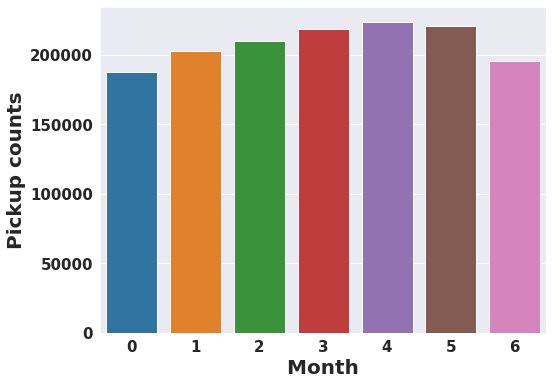

In [ ]:
#Let's take a look now at the distribution of taxi pickups across the week.
plt.figure(figsize = (8,6))
sns.countplot(df.weekday_num)
plt.xlabel(' Month ')
plt.ylabel('Pickup counts')
plt.show()

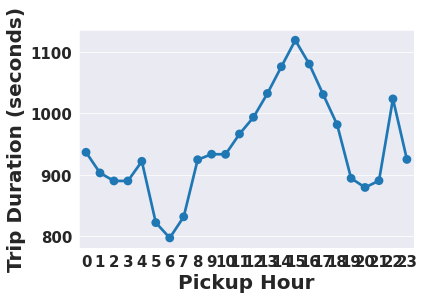

In [ ]:
group1 = df.groupby('pickup_hour').trip_duration.mean()
sns.pointplot(group1.index, group1.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Pickup Hour')
plt.show()

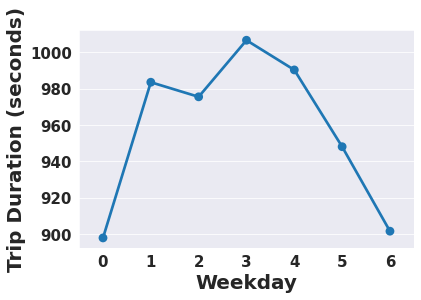

In [ ]:
group2 = df.groupby('weekday_num').trip_duration.mean()
sns.pointplot(group2.index, group2.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Weekday')
plt.show()

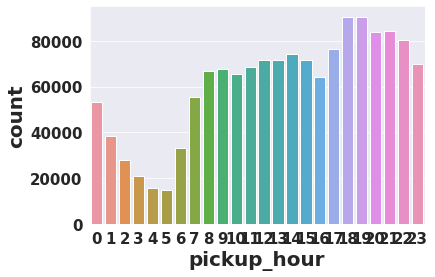

In [ ]:
sns.countplot(df.pickup_hour)
plt.show()